# Store Challenge

Ajuda o sr João a decidir qual loja vender.

Vamos receber dados sobre as lojas, que consistem em:

1. Faturamento total da loja
2. Categorias de produtos mais populares
3. Média de avaliação dos clientes
4. Produtos mais e menos vendidos
5. Custo médio do frete


Custo do frete - Preço
Avaliação -
Tipo de pagamento




In [143]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


In [37]:
def calculo_preco(lojas: list):
  faturamento_lojas = {}
  for i, loja in enumerate(lojas):
    faturamento_bruto = round(sum(loja['Preço']), 2)
    custo_frete = round(sum(loja["Frete"]), 2)

    faturamento_lojas[f'Loja {i + 1}'] = {
        f"Faturamento bruto": faturamento_bruto,
        f"Custo Frete": custo_frete,
        f"Faturamento Líquido": round((faturamento_bruto - custo_frete), 2)
        }

  return pd.DataFrame(faturamento_lojas)



lojas = [loja1, loja2, loja3, loja4]
dados_faturamento = calculo_preco(lojas)
dados_faturamento

,Loja 1,Loja 2,Loja 3,Loja 4
Faturamento bruto,1534509.12,1488459.06,1464025.03,1384497.58
Custo Frete,81837.97,79314.16,78022.66,73755.88
Faturamento Líquido,1452671.15,1409144.90,1386002.37,1310741.70


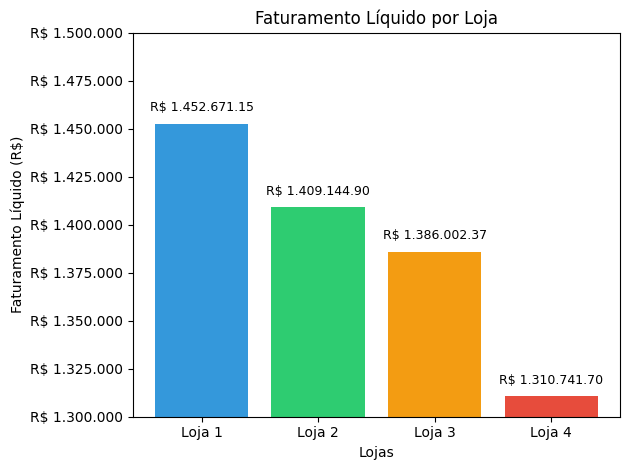

In [3]:
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FuncFormatter

cores = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

barras = plt.bar(dados_faturamento.columns, dados_faturamento.loc['Faturamento Líquido'], color=cores)

# Formatação do eixo Y para mostrar valores completos com separador de milhar
def formatar_eixo(x, pos):
    return f'R$ {x:,.0f}'.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_eixo))

# Definindo limites do eixo Y para melhor visualização
plt.ylim(1300000, 1500000)  # Ajuste conforme necessário

# Adicionando valor em cima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 5000,
             f'R$ {altura:,.2f}'.replace(',', '.'),
             ha='center', va='bottom', rotation=0, fontsize=9)

plt.xlabel("Lojas")
plt.ylabel("Faturamento Líquido (R$)")
plt.title("Faturamento Líquido por Loja")
plt.tight_layout()
plt.savefig("faturamento-liquido-loja")


In [38]:
def calculo_categoria(lojas: list):
  lojas_categoria = pd.DataFrame()
  for i, loja in enumerate(lojas):
    lojas_categoria[f'Loja {i + 1}'] = loja['Categoria do Produto'].value_counts()


  return lojas_categoria

categorias_lojas = calculo_categoria(lojas)
categorias_lojas

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


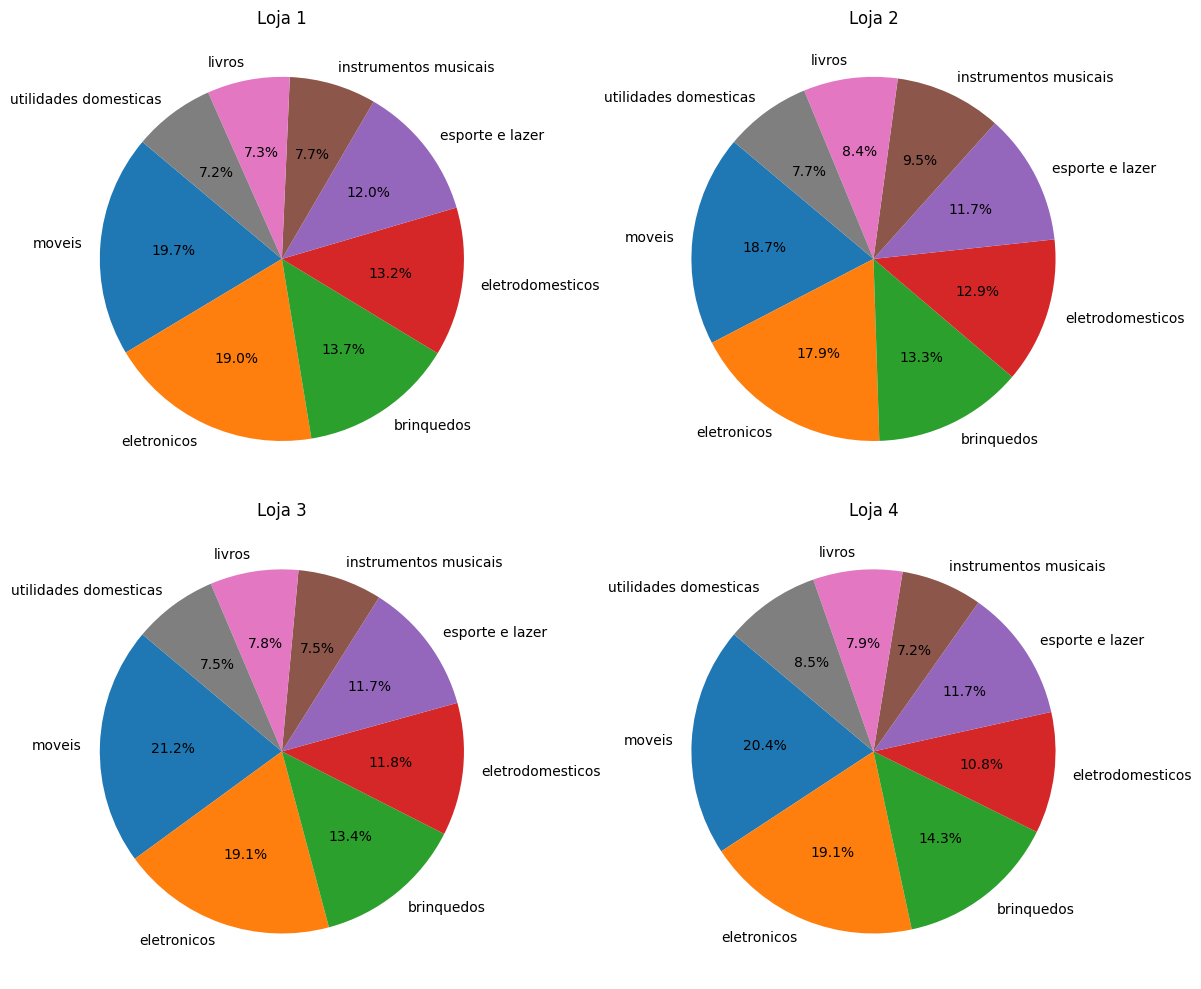

In [23]:
# Dados
categorias = [categoria for categoria in categorias_lojas.T.columns]

# Criação das subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Lista com os dados das lojas
dados_lojas = [dados for dados in categorias_lojas.T.values]
titulos = [loja for loja in categorias_lojas.columns]


# Plotar os gráficos de pizza
for i, ax in enumerate(axs.flat):
    ax.pie(dados_lojas[i], labels=categorias, autopct='%1.1f%%', startangle=140)
    ax.set_title(titulos[i])

plt.tight_layout()
plt.savefig('piechart-categorias')

In [61]:
lojas = [loja1, loja2, loja3, loja4]

def avaliacao_lojas(lojas: list):
  avaliacao_lojas = pd.DataFrame()
  for i, loja in enumerate(lojas):
    avaliacao_lojas[f'Loja {i + 1}'] = [round(loja['Avaliação da compra'].mean(), 2)]
  return avaliacao_lojas


avaliacao = avaliacao_lojas(lojas)
avaliacao

,Loja 1,Loja 2,Loja 3,Loja 4
0,3.98,4.04,4.05,4.0


In [148]:
def produtos(lojas: list):
  dic = {
      'Loja': [],
      '+ Vendido': [],
      '+ Qtd': [],
      '- Vendido': [],
      '- Qtd': []
      }

  for i, loja in enumerate(lojas):
    try:
      contagem = loja['Produto'].value_counts()
      nome_max = contagem.idxmax()
      max = contagem.max()
      nome_min = contagem.idxmin()
      min = contagem.min()
      dic['Loja'].append(f'Loja {i+1}')
      dic['+ Vendido'].append(nome_max)
      dic['+ Qtd'].append(max)
      dic['- Vendido'].append(nome_min)
      dic['- Qtd'].append(min)
    except:
      pass
  return pd.DataFrame(dic)

produtos = produtos(lojas)
produtos



,Loja,+ Vendido,+ Qtd,- Vendido,- Qtd
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


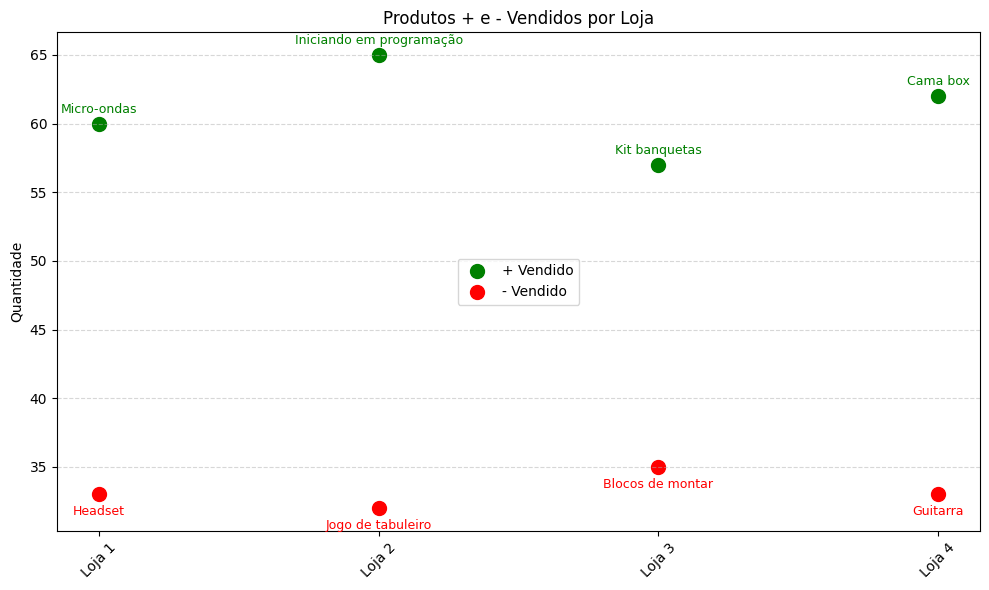

In [161]:
def plot_produtos_vertical(df):
    fig, ax = plt.subplots(figsize=(10, 6))

    lojas = df['Loja']
    x = range(len(lojas))
    y1 = df['+ Qtd']
    y2 = df['- Qtd']

    ax.scatter(x, y1, color='green', label='+ Vendido', s=100)
    ax.scatter(x, y2, color='red', label='- Vendido', s=100)

    # Adiciona os nomes dos produtos acima dos pontos
    for i in x:
        ax.text(i, y1[i] + 0.8, df['+ Vendido'][i], ha='center', fontsize=9, color='green')
        ax.text(i, y2[i] - 1.5, df['- Vendido'][i], ha='center', fontsize=9, color='red')

    ax.set_xticks(x)
    ax.set_xticklabels(lojas, rotation=45)
    ax.set_ylabel('Quantidade')
    ax.set_title('Produtos + e - Vendidos por Loja')
    ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5))
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('+_-_vendidos')

# Usar a função:
plot_produtos_vertical(produtos)

In [164]:
def frete_medio(lojas: list):
  frete_lojas = pd.DataFrame()
  for i, loja in enumerate(lojas):
    try:
      frete_lojas[f'Loja {i + 1}'] = [round(loja['Frete'].mean(), 2)]
    except:
      pass
  return frete_lojas

frete = frete_medio(lojas)
frete

,Loja 1,Loja 2,Loja 3,Loja 4
0,34.69,33.62,33.07,31.28


In [182]:
def lucro_tempo(lojas: list):
    lucro_lojas = {
        'Loja': [],
        'Lucro Total': [],
        'Dias de Operação': [],
        'Lucro Médio Mensal': []
    }

    for i, loja in enumerate(lojas):
        try:
            # Garante que a coluna de data está no formato datetime
            loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], format='%d/%m/%Y')

            soma = loja['Preço'].sum()
            tempo = (loja['Data da Compra'].max() - loja['Data da Compra'].min()).days

            # Evita divisão por zero caso haja só uma data
            if tempo == 0:
                tempo = 1

            lucro_mensal = round((soma / tempo) * 30, 2)

            lucro_lojas['Loja'].append(f'Loja {i+1}')
            lucro_lojas['Lucro Total'].append(round(soma, 2))
            lucro_lojas['Dias de Operação'].append(tempo)
            lucro_lojas['Lucro Médio Mensal'].append(lucro_mensal)

        except Exception as e:
            pass

    return pd.DataFrame(lucro_lojas)

# Exemplo de uso:
lucro = lucro_tempo(lojas)
lucro

,Loja,Lucro Total,Dias de Operação,Lucro Médio Mensal
0,Loja 1,1534509.12,1185,38848.33
1,Loja 2,1488459.06,1185,37682.51
2,Loja 3,1464025.03,1185,37063.92
3,Loja 4,1384497.58,1184,35080.18


# Relatório:

Nesse relatório vamos analisar dados referentes ao gerenciamento de 4 lojas com o objetivo de determinar a performance de cada loja e indicar qual loja deve ser vendida. Vou apresentar os dados comparados das lojas e depois faremos uma análise mais profunda de cada uma. Apresentando a conclusão no final.

## 1. Análise de Faturamento:

  Após os cálculos do faturamento líquido de cada uma das lojas, podemos concluir que a loja 1 é a mais rentável, seguida da loja 2 e 3, respectivamente, enquanto que a loja 4 é a que gerou menor lucro.
  Gráfico abaixo:
  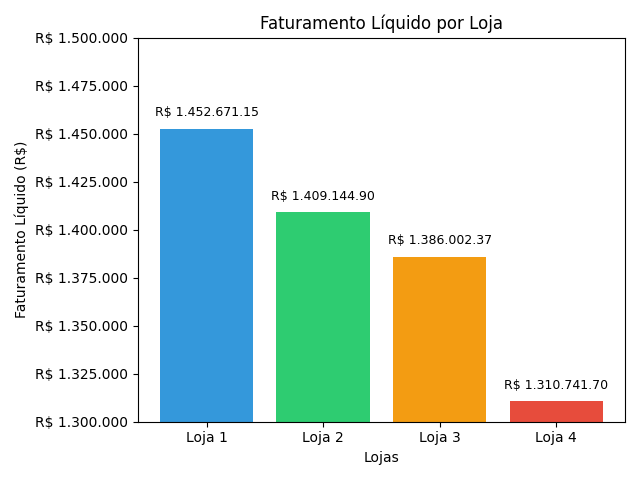

## 2. Vendas por categoria:
  
  Aqui notamos que a relação de vendas por categorias é muito semelhante entre as lojas. Segue uma lista com as 3 mais vendidas:
  1. Móveis
  2. Eletrônicos
  3. Brinquedos

  
  As menos vendidas são similares também:
  1. Utilidades Domésticas
  2. Livros
  3. Instrumentos Musicais

  Segue o gráfico:
  
  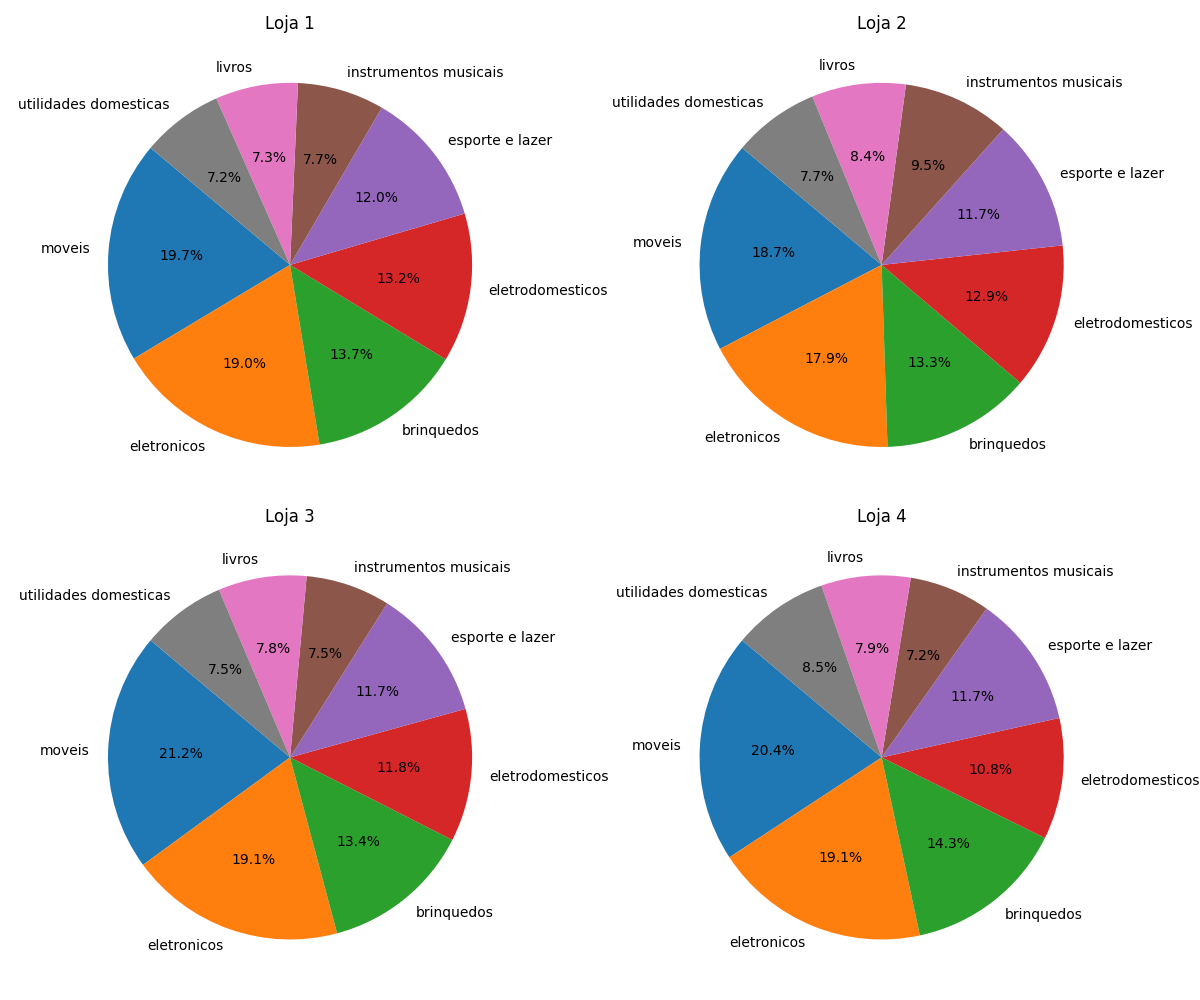


## 3. Média de Avaliação das Lojas:

  Não houve muita diferença dessa métrica entre as lojas, seguem os números:

  Loja 1: 3.98

  Loja 2: 4.04

  Loja 3: 4.05
  
  Loja 4: 4.0

## 4. Análise de Desempenho de Produtos

  Loja 1:

  1. O mais vendido foi: Micro-Ondas - 60 unidades

  2. O menos vendido foi: Headset - 33 unidades


  Loja 2:

  1. O mais vendido foi: Iniciando em Programação - 65 unidades

  2. O menos vendido foi: Jogo de Tabuleiro - 32 unidades


  Loja 3:

  1. O mais vendido foi: Kit Banquetas - 57 unidades

  2. O menos vendido foi: Blocos de montar - 35 unidades
  

  Loja 4:

  1. O mais vendido foi: Cama Box - 62 unidades

  2. O menos vendido foi: Guitarra - 33 unidades

  Segue gráfico:
  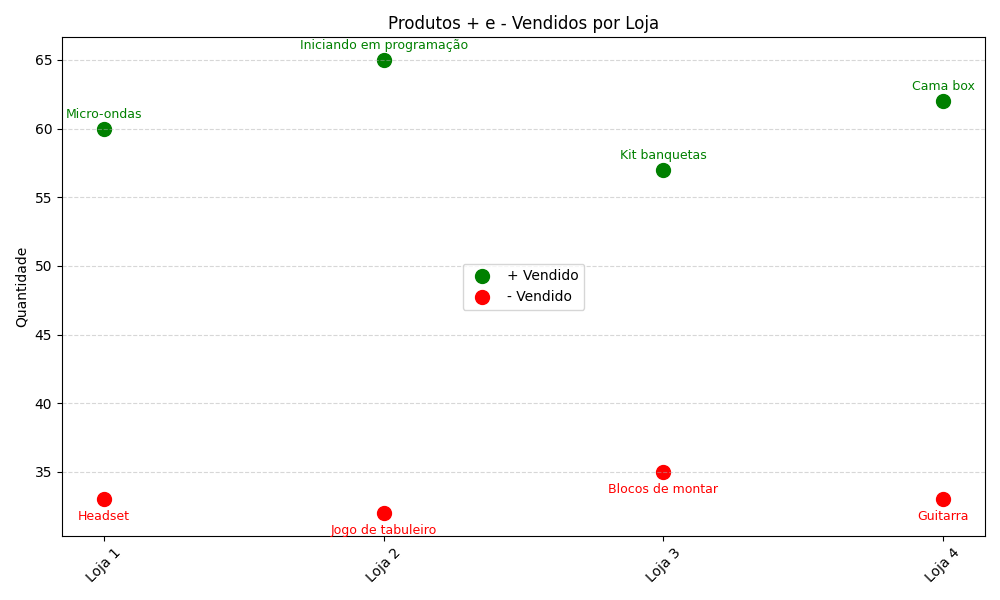

## 5. Frete Médio por loja

  Loja 1: R$ 34,69

  Loja 2: R$ 33,62

  Loja 3: R$ 33,07

  Loja 4: R$ 31,28


# Síntese

Vou analisar cada loja individualmente e depois apresentarei uma síntese com a decisão final sobre qual loja vender.

## Loja 1:

Essa é a loja que mais lucra, mesmo tendo a maior média de frete. Nela o item mais vendido é o Micro-Ondas e o menos vendido é o Headset. A avaliação das vendas é 3.98/5, a menor entre as lojas, porém, a diferença entre as lojas é muito pequena, sendo irrelevante. As categorias mais vendidas são os Móveis, Eletrônicos e Brinquedos, respectivamente. Os eletrodomésticos vem logo atrás dos brinquedos, podendo ser considerados nessa análise. As menos vendidas são Utilidades Domésticas, Livros e Instrumentos Musicais.

## Loja 2:

Essa é segunda loja que mais lucra, possui a segunda maior média de frete. Nela o item mais vendido é o Iniciando em Programação e o menos vendido é o Jogo de Tabuleiro. A avaliação das vendas é 4.04/5, a segunda maior entre as lojas. As categorias mais vendidas são os Móveis, Eletrônicos e Brinquedos, respectivamente. Novamente os eletrodomésticos vem logo atrás dos brinquedos. As menos vendidas são Utilidades Domésticas, Livros e Instrumentos Musicais. Aqui Instrumentos Musicais possuem um número considerávelmente maior que nas outras lojas.

## Loja 3:

Essa é terceira loja que mais lucra, possui a terceira maior média de frete. Nela o item mais vendido é o Kit Banquetas e o menos vendido é o Blocos de Montar. A avaliação das vendas é 4.05/5, a maior entre as lojas. As categorias mais vendidas são os Móveis, Eletrônicos e Brinquedos, respectivamente. As menos vendidas são Utilidades Domésticas, Livros e Instrumentos Musicais

## Loja 4:

Essa é a loja que menos lucra, possui a menor média de frete. Nela o item mais vendido é a Cama Box e o menos vendido é a Guitarra. A avaliação das vendas é 4.0/5. As categorias mais vendidas são os Móveis, Eletrônicos e Brinquedos, respectivamente. As menos vendidas são Utilidades Domésticas, Livros e Instrumentos Musicais.

# Conclusão

Com base nessa análise podemos afirmar que a loja 4 é a melhor candidata a ser vendida, já que ela possui o menor lucro e nenhuma das outras métricas se mostra relevante para projeções de crescimento.
